<a href="https://colab.research.google.com/github/otitamario/sp-pa-gep/blob/main/notebooks/exp3_halpern_vs_mann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the repository into Colab runtime
!git clone https://github.com/otitamario/sp-pa-gep.git

# Move into repo root
%cd sp-pa-gep

# Make sure Python sees the project root
import sys
import os

# Move to repo root if needed
if not os.path.exists("src"):
    %cd sp-pa-gep

sys.path.append(".")


Cloning into 'sp-pa-gep'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 70 (delta 22), reused 30 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 402.00 KiB | 13.86 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/sp-pa-gep


SPPA reaches tolerance at iteration: 19
WPPA reaches tolerance at iteration: 28


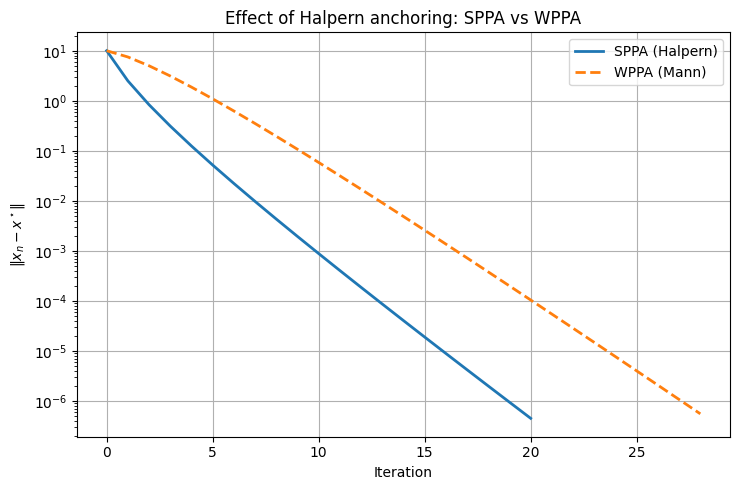

In [2]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from src.algorithms import SPPA, WPPA
from src.operators import resolvent_linear_identity
from src.utils import norm

# -----------------------------
# Problem parameters
# -----------------------------
n = 100
x_star = np.zeros(n)
x0 = np.ones(n)
u = np.zeros(n)
r = 1.0

# Step-size sequence (Halpern / Mann)
Nmax = 500
alpha_seq = [1.0 / (k + 2) for k in range(Nmax)]

tol = 1e-6

# -----------------------------
# Run SPPA
# -----------------------------
hist_sppa = SPPA(x0, u, alpha_seq, r, resolvent_linear_identity)
err_sppa = [norm(x - x_star) for x in hist_sppa]

# -----------------------------
# Run WPPA
# -----------------------------
hist_wppa = WPPA(x0, alpha_seq, r, resolvent_linear_identity)
err_wppa = [norm(x - x_star) for x in hist_wppa]

# -----------------------------
# Stopping iteration
# -----------------------------
it_sppa = next((k for k, e in enumerate(err_sppa) if e <= tol), len(err_sppa))
it_wppa = next((k for k, e in enumerate(err_wppa) if e <= tol), len(err_wppa))

print(f"SPPA reaches tolerance at iteration: {it_sppa}")
print(f"WPPA reaches tolerance at iteration: {it_wppa}")

# -----------------------------
# Plot error decay
# -----------------------------
plt.figure(figsize=(7.5, 5))
plt.semilogy(err_sppa, label="SPPA (Halpern)", linewidth=2)
plt.semilogy(err_wppa, label="WPPA (Mann)", linestyle="--", linewidth=2)

plt.xlabel("Iteration")
plt.ylabel(r"$\|x_n - x^\star\|$")
plt.title("Effect of Halpern anchoring: SPPA vs WPPA")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save BEFORE show
plt.savefig("figures/exp3_halpern_vs_mann.png", dpi=300, bbox_inches="tight")
plt.show()
